In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import time

In [207]:
t_ex = pd.read_csv('TrainingSetDHM_400.csv', header = 0)
#t_vis = t_ex.sort_values(by=["y"])

In [212]:
f_val = np.array((t_ex.values)[:,:404])
f_val = np.delete(f_val,0,1)
f_val.shape

(1647, 401)

In [230]:
y = np.array(((t_ex.values).T)[401,:])
#yVis = np.array((t_vis.values.T)[52,:])
X = np.column_stack((np.ones(len(y)),f_val))

In [231]:
for i in range(1,len(y)):
    print(y)

[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978

 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  ... 28.46952978  5.59663655
 17.71849208]
[19.3290322   8.86468986  4.8694258  .

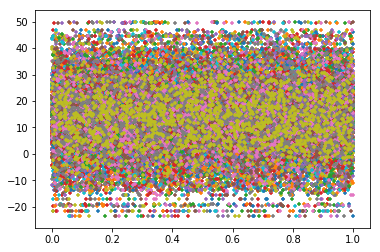

In [205]:
plt.subplot(111)
#plt.scatter(f_val, y, s=10, marker='+')
#plt.scatter(np.array((t_ex.values.T)[1,:]), y, s=10, marker='+')
#plt.scatter(np.array((t_ex.values.T)[2,:]), y, s=10, marker='+')
for t in range(1,50):
    plt.scatter(np.array((t_ex.values.T)[t,:]), y, s=10, marker='+')
    plt.plot()
    time.sleep(1)

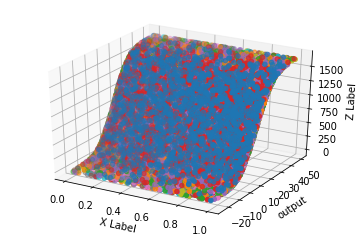

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for t in range(1,50):
    xs = np.array((t_ex.values.T)[t,:])
    ys = yVis
    zs = range(len(yVis))
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('output')
ax.set_zlabel('Z Label')

plt.show()

[]

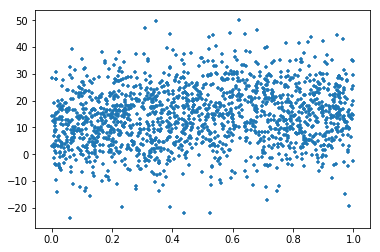

In [104]:
plt.subplot(111)
plt.scatter(np.array((t_ex.values.T)[1,:]), y, s=10, marker='+')
plt.plot()

In [146]:
initTheta = np.zeros((len(X[0])))
initTheta.shape

(11,)

In [142]:
alpha = 0.01
iterations = 1500

In [147]:
def computeCost(cX, cy, ct):
    m = len(cy)
    predictions = cX @ ct
    sqrErrors = (predictions - cy) ** 2
    J = 1 / (2 * m) * sum(sqrErrors)
    return J

testJ = computeCost(X, y, initTheta)
testJ

160.54051302053364

In [155]:
def gradientDescent(gX, gy, gt, alpha, iterations):
    h = []
    m = len(gy)
    for i in range(iterations):
        delta = ((gX @ gt - gy) @ gX) / m
        gt = gt - (alpha * delta)
        h.append(computeCost(gX,gy,gt))
    return gt, h

In [159]:
theta, historial = gradientDescent(X, y, initTheta, alpha, iterations)
print(theta)
print(historial)

[ 2.26807152  4.49237907  6.05393671  1.42866469  7.28557162  3.7353555
 -0.16775813  0.69136399  0.58406353 -0.55303711  0.71012725]
[153.38164783973875, 146.72056463727014, 140.5226050624661, 134.7555239473299, 129.3893212819416, 124.3960858890568, 119.74984998329687, 115.42645385706001, 111.40341998805602, 107.65983591245704, 104.17624525332813, 100.93454633651297, 97.91789786566866, 95.1106311649408, 92.49816853198791, 90.06694727590379, 87.80434904421386, 85.69863407067326, 83.73888000125085, 81.91492497951961, 80.21731469489039, 78.63725311775718, 77.16655666484765, 75.79761155593825, 74.52333413972646, 73.33713398212818, 72.23287952465104, 71.20486613390324, 70.24778637574273, 69.35670235917286, 68.52702000587014, 67.75446511126981, 67.03506107246373, 66.36510816685671, 65.74116427360403, 65.16002693737141, 64.61871668095905, 64.11446147982657, 63.644682317626526, 63.20697974747136, 62.7991213889115, 62.419030295470826, 62.0647741321237, 61.734555106323, 61.42670060010604, 61.13

In [166]:
his = np.array((historial))

[]

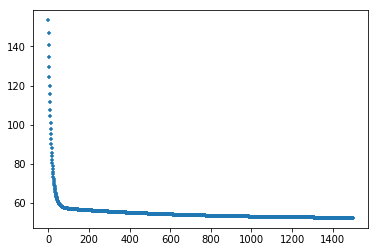

In [168]:
plt.subplot(111)
plt.scatter(range(iterations), his, s=10, marker='+')
plt.plot()

In [134]:
a = np.array([1, 2])
b = np.array([[2, 4], [3, 5]])
c = a @ b
print(c)
print(np.shape(a))
print(np.shape(b))
print(np.shape(c))

[ 8 14]
(2,)
(2, 2)
(2,)


In [152]:
w = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([1 , 2])
z = np.column_stack((v,w))
print(z)
z2 = np.sum(z, 0) #0 for column sum, 1 for row sum
print(z2)

[[1 1 2 3]
 [2 4 5 6]]
[3 5 7 9]


In [153]:
column_v = np.array([1, 2])
#w[:,0] = column_v * w[:,0]
#w[:,1] = column_v * w[:,1]
(w.T * column_v).T

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [4]:
mf = pd.read_csv('MunicipalityFeatures_INPUT_DATA2_CVS.csv',header=None)
mf

,0,1,2,3,4,5
0,1_2,0.662,-1.01448,2.874155e+04,45492.0,4
1,1_11,0.717,-1.30230,2.259862e+04,35769.0,0
2,1_7,0.715,-1.25519,3.105644e+04,49156.0,1
3,1_8,0.694,-1.09728,5.334232e+03,8443.0,0
4,1_5,0.723,-1.29650,6.292031e+04,99590.0,3
5,1_9,0.675,-1.03717,1.242611e+04,19668.0,1
6,1_1,0.789,-1.55848,5.035457e+05,797010.0,34
7,1_6,0.740,-1.34386,2.644814e+04,41862.0,5
8,1_10,0.661,-0.88536,1.189541e+04,18828.0,4
9,1_3,0.670,-1.10194,3.420277e+04,54136.0,5


[]

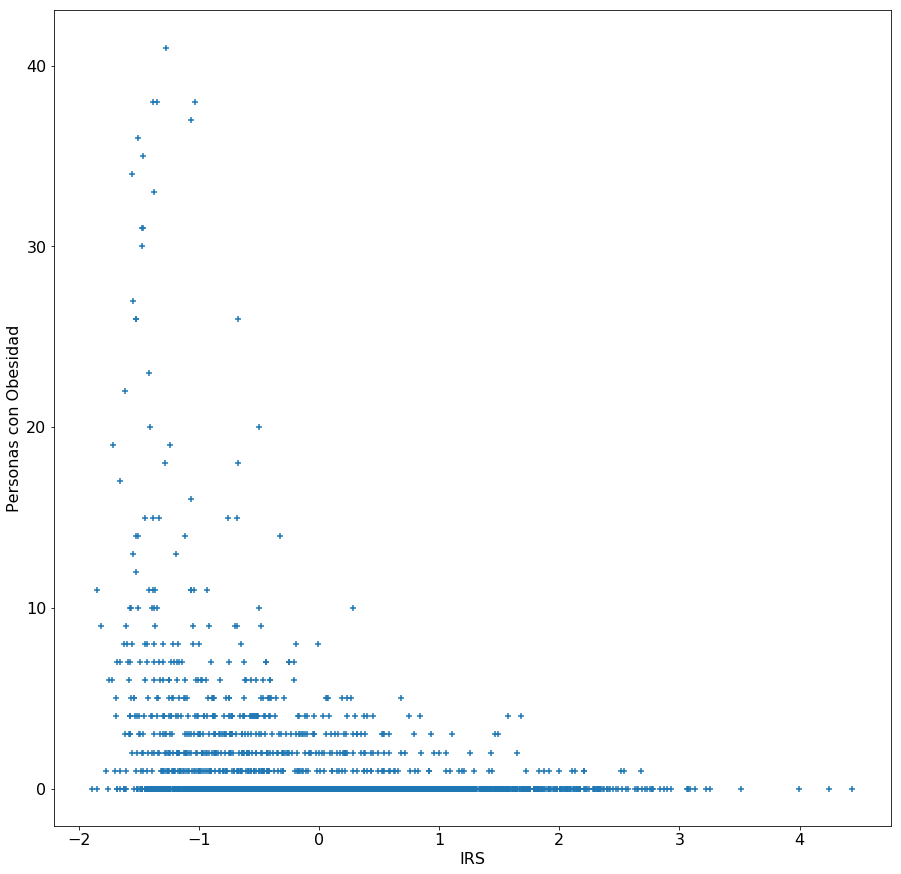

In [56]:
plt.subplot(111)
plt.scatter(mf[2], mf[5], s=30, marker='+')
#plt.set_xlabel('IDH')
plt.xlabel("IRS")
plt.ylabel("Personas con Obesidad")
plt.plot()

Text(0.5,0,'personas obesas')

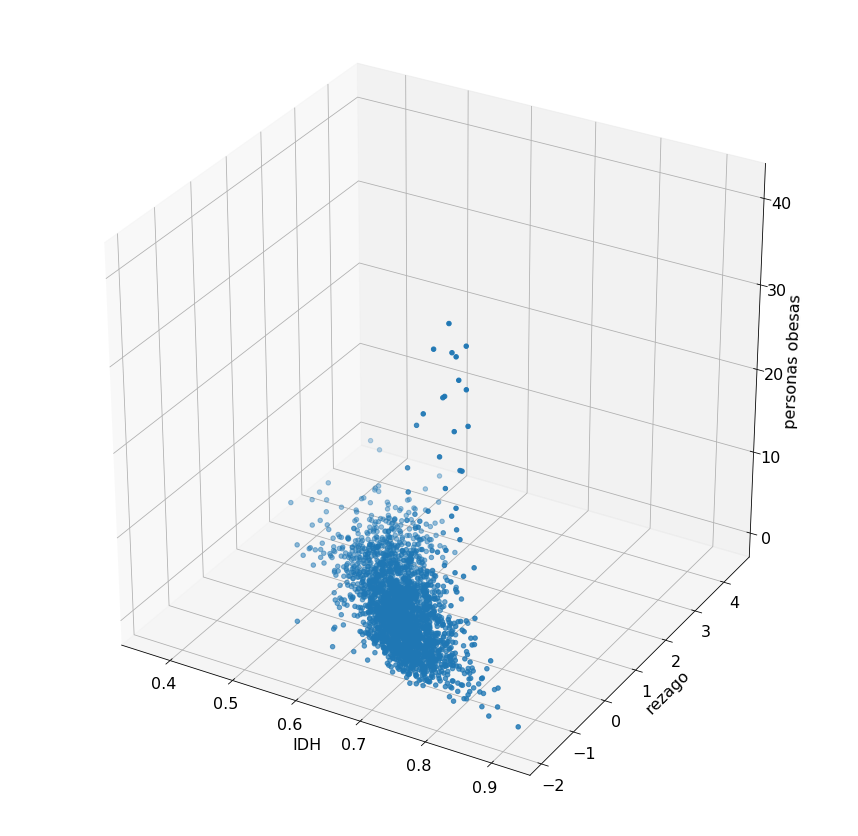

In [53]:
;



# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for t in range(1,50):
xs = mf[1]
ys = mf[2]
zs = mf[5]
ax.scatter(xs, ys, zs)

ax.set_xlabel('IDH')
ax.set_ylabel('rezago')
ax.set_zlabel('personas obesas')

#for angle in range(0, 360):
    #ax.view_init(30, angle)
    #plt.draw()
    #plt.pause(.001)
#plt.show()

In [26]:
byObesity = mf.sort_values(by=[5], ascending = False)

In [35]:
byObesity.values[1][5]

38

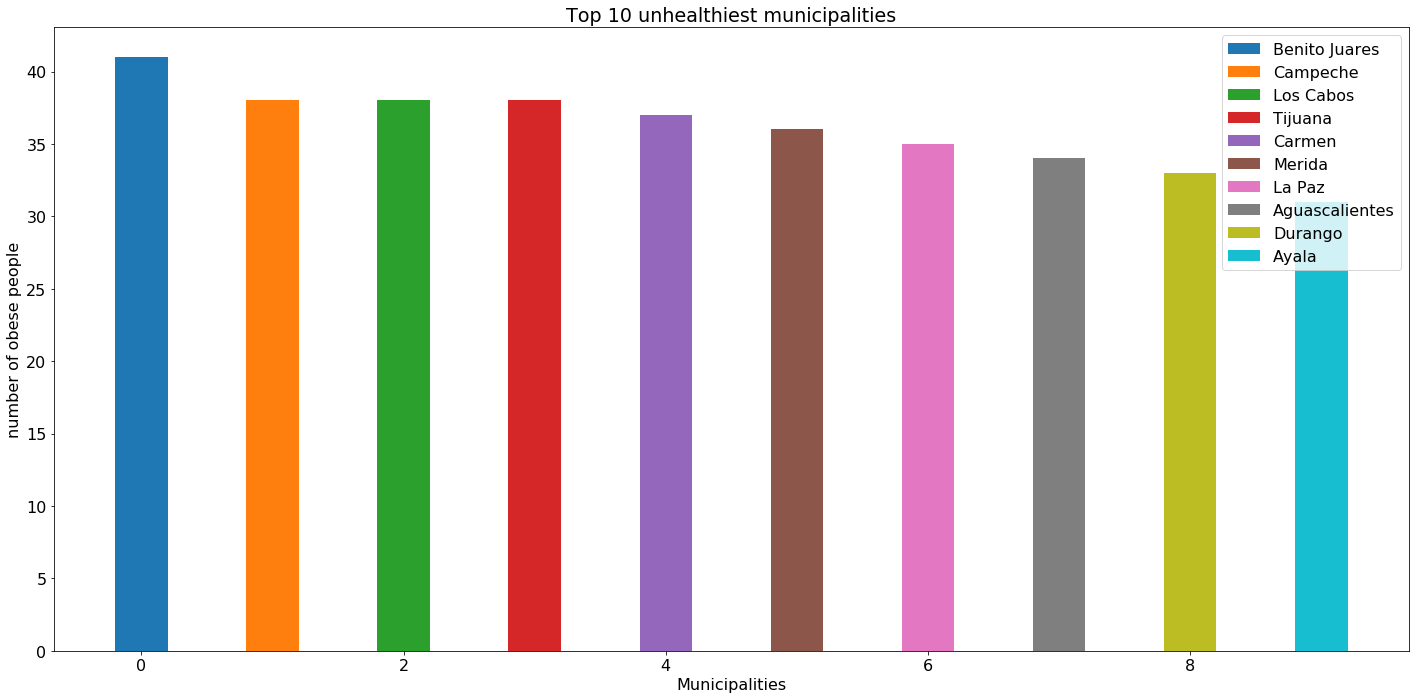

In [51]:
top10names = ['Benito Juares','Campeche','Los Cabos','Tijuana','Carmen','Merida','La Paz','Aguascalientes','Durango','Ayala']
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})
for num in range(10):
    rects1 = ax.bar(num, byObesity.values[num][5],.4,label=top10names[num])
    #byObesity.values[num][5]
#ax.set_xticklabels(top10names)

ax.set_xlabel('Municipalities')
ax.set_ylabel('number of obese people')
ax.set_title('Top 10 unhealthiest municipalities')
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))

ax.legend()

fig.tight_layout()
plt.show()
#23_5 = 'Benito Juares'
#4_2 = 'Campeche'
#3_8 = 'Los Cabos'
#2_4 = 'Tijuana'
#4_3 = 'Carmen'
#31_50 = 'Merida'
#3_3 = 'La Paz'
#1_1 = 'Aguascalientes'
#10_5 = 'Durango'
#27_4 = 'Ayala'

